# Titanic Datasets



# Brief Introduction about Titanic Ship

Titanic was a British passenger liner operated by the White Star Line that sank in the North Atlantic Ocean in the early morning hours of 15 April 1912, after striking an iceberg during her maiden voyage from Southampton to New York City. Of the estimated 2,224 passengers and crew aboard, more than 1,500 died, making the sinking one of modern history's deadliest peacetime commercial marine disasters. Though there were about 2,224 passengers and crew members, we are given data of about 1,300 passengers. Out of these 1,300 passengers details, about 9000 data is used for training purpose and remaining 400 is used for test purpose. In this competition we are given about 400 test data with missing survived column and we have to use different machine learning algorithms to predict whether the passengers in the test data survived or not. Both training and test data arenot clean(contains lots of missing values), so main goal of this competition is to clean the data and build the model with best accuracy.

# Understanding the data

Survival : 0 = No, 1 = Yes

Pclass : A proxy for socio-economic status (SES) 1st = Upper 2nd = Middle 3rd = Lower

sibsp : The # of siblings / spouses aboard the Titanic Sibling = brother, sister, stepbrother, stepsister Spouse =

husband, wife (mistresses and fiancés were ignored)

parch : The # of parents / children aboard the Titanic Parent = mother, father Child = daughter, son, stepdaughter, stepson Some children travelled only with a nanny, therefore parch=0 for them.

Ticket : Ticket number

Fare : Passenger fare

Cabin : Cabin number embarked

Port of Embarkation: C = Cherbourg, Q = Queenstown, S = Southampton

Name, Sex , Age are self-explanatory




# Import the necessary libraries

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [3]:
# Load Titanic Dataset
train= pd.read_csv("C:\\Users\\Hp\\Downloads\\train (1).csv")
test= pd.read_csv("C:\\Users\\Hp\\Downloads\\test (1).csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Check the shape of training sets
train.shape

(891, 12)

In [5]:
df = train.copy()

In [6]:
testo =test.copy()

# Droping useless columns

In [7]:
df.drop(columns=['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
test.drop(columns=['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [9]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Handling missing values

In [10]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

In [11]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [12]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [13]:
test['Age'].fillna(df['Age'].median(), inplace=True)
test['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [14]:
# Check the missing values in training sets
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [16]:
# Since 'Fare' is mainly related to 'Pclass', we should check which class this person belongs to.
df[df.Fare.isnull()]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked


In [17]:
# It's a passenger from Pclass 3, so we'll fill the missing value with the median fare of Pclass 3.
df.Fare.fillna(df[df.Pclass==3]['Fare'].median(),inplace=True)
test.Fare.fillna(df[df.Pclass==3]['Fare'].median(),inplace=True)

In [18]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [19]:
test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [20]:
print('Duplicated data =',df.duplicated() .sum())

Duplicated data = 0


In [21]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


# Univariate Analysis

In [22]:
def barplot(variable):
    """
    input: variable ex: "Sex"
    output: bar plot & value count
    """
    #get feature
    var = df[variable]
    #count number of categorical variable(value/sample)
    varValue = var.value_counts()
    
    #visualize
    plt.figure(figsize = (9,3))
    plt.bar(varValue.index,varValue) #x = 0 or 1 y = varValue
    plt.xticks(varValue.index,varValue.index.values)
    plt.ylabel('Frequency')
    plt.title(variable)
    plt.show()
    print("{}: \n {}:".format(variable,varValue))

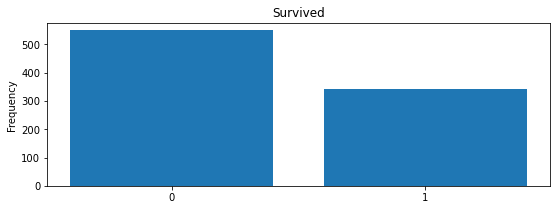

Survived: 
 0    549
1    342
Name: Survived, dtype: int64:


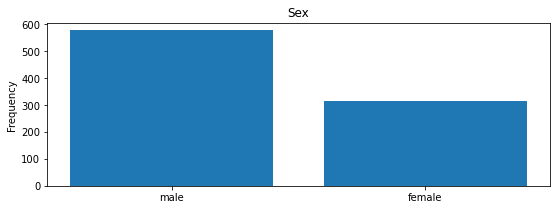

Sex: 
 male      577
female    314
Name: Sex, dtype: int64:


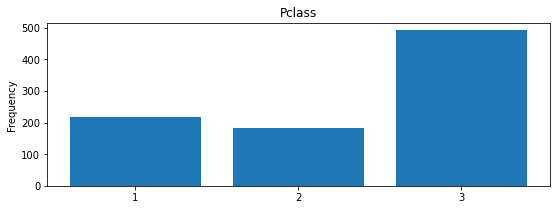

Pclass: 
 3    491
1    216
2    184
Name: Pclass, dtype: int64:


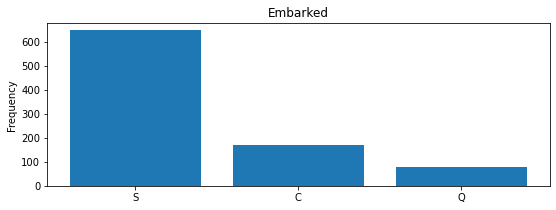

Embarked: 
 S    646
C    168
Q     77
Name: Embarked, dtype: int64:


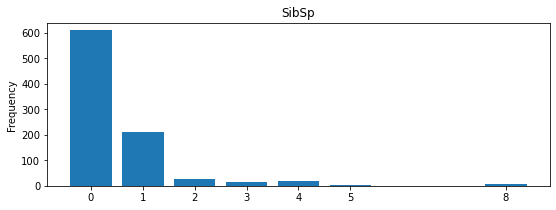

SibSp: 
 0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64:


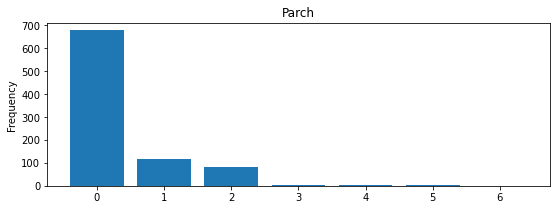

Parch: 
 0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64:


In [23]:
category1 = ['Survived','Sex','Pclass','Embarked','SibSp','Parch']
for c in category1:
    barplot(c)

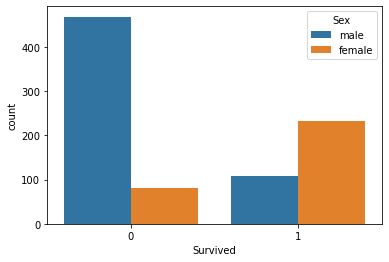

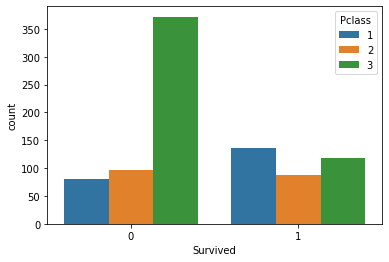

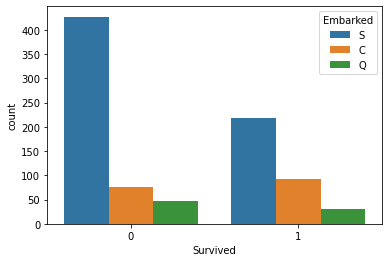

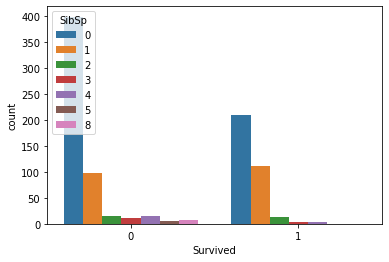

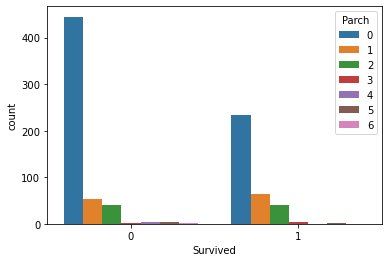

In [24]:
category1 = ['Sex','Pclass','Embarked','SibSp','Parch']

for col in category1:
    plt.figure()
    sns.countplot(x='Survived',hue=col,data=df)


# Basic Data Analysis

In [25]:
# Pclass vs Survived
df[['Pclass','Survived']].groupby(['Pclass'],as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [26]:
# Sex vs Survived
df[['Sex','Survived']].groupby(['Sex'],as_index = False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [27]:
df[['SibSp','Survived']].groupby(['SibSp']).mean()

,Survived
SibSp,
0,0.345395
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000


In [28]:
#Parch vs Survived
df[['Parch','Survived']].groupby(['Parch']).mean()

,Survived
Parch,
0,0.343658
1,0.550847
2,0.500000
3,0.600000
4,0.000000
5,0.200000
6,0.000000


# Handling Outliers

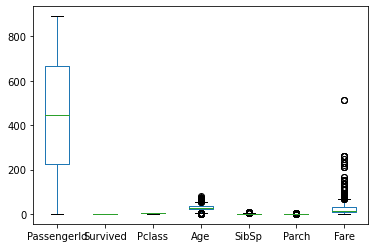

In [29]:
df.plot(kind='box')

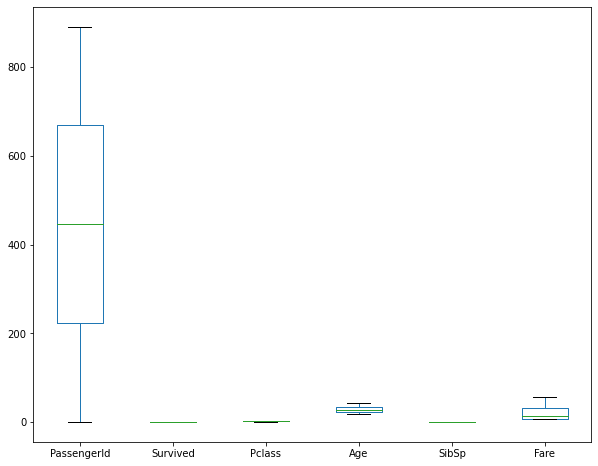

In [30]:
cols= ['Age', 'SibSp', 'Parch', 'Fare']

df[cols]= df[cols].clip(lower= df[cols].quantile(0.15), upper= df[cols].quantile(0.85), axis=1)

df.drop(columns=['Parch'], axis=1, inplace=True)
test.drop(columns=['Parch'], axis=1, inplace=True)

df.plot(kind='box', figsize= (10,8)) 
# no outliers 

In [31]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Fare,Embarked
0,1,0,3,male,22.0,1,7.7500,S
1,2,1,1,female,38.0,1,56.4958,C
2,3,1,3,female,26.0,0,7.9250,S
3,4,1,1,female,35.0,1,53.1000,S
4,5,0,3,male,35.0,0,8.0500,S


In [32]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Fare,Embarked
0,892,3,male,34.5,0,7.8292,Q
1,893,3,female,47.0,1,7.0000,S
2,894,2,male,62.0,0,9.6875,Q
3,895,3,male,27.0,0,8.6625,S
4,896,3,female,22.0,1,12.2875,S


# Label encoding the categorical data

In [33]:
from sklearn import preprocessing
LabelEncoder = preprocessing.LabelEncoder()
df['Embarked'] = LabelEncoder.fit_transform(df['Embarked'])
test['Embarked'] = LabelEncoder.transform(test['Embarked'])
df['Sex'] = LabelEncoder.fit_transform(df['Sex'])
test['Sex'] = LabelEncoder.fit_transform(test['Sex'])
y = df['Survived']
X = df.drop(['Survived'],axis=1)

In [34]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [35]:
# Splitting Datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [36]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
test = scaler.fit_transform(test)

In [37]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
plt.rcParams["font.family"] = 'DejaVu Sans'

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [38]:
from datetime import datetime
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
def perform_model(model, X_train, y_train, X_test, y_test, class_labels, cm_normalize=True, \
                 print_cm=True, cm_cmap=plt.cm.Greens):
    
    
    # to store results at various phases
    results = dict()
    
    # time at which model starts training 
    train_start_time = datetime.now()
    print('training the model..')
    model.fit(X_train, y_train)
    print('Done \n \n')
    train_end_time = datetime.now()
    results['training_time'] =  train_end_time - train_start_time
    print('training_time(HH:MM:SS.ms) - {}\n\n'.format(results['training_time']))
    # predict test data
    print('Predicting test data')
    test_start_time = datetime.now()
    y_pred = model.predict(X_test)
    test_end_time = datetime.now()
    print('Done \n \n')
    results['testing_time'] = test_end_time - test_start_time
    print('testing time(HH:MM:SS:ms) - {}\n\n'.format(results['testing_time']))
    results['predicted'] = y_pred
   

    # calculate overall accuracty of the model
    accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
    # store accuracy in results
    results['accuracy'] = accuracy
    print('---------------------')
    print('|      Accuracy      |')
    print('---------------------')
    print('\n    {}\n\n'.format(accuracy))
     # confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    results['confusion_matrix'] = cm
    if print_cm: 
        print('--------------------')
        print('| Confusion Matrix |')
        print('--------------------')
        print('\n {}'.format(cm))
        
    # plot confusin matrix
    plt.figure(figsize=(4,4))
    plt.grid(b=False)
    plot_confusion_matrix(cm, classes=class_labels, normalize=True, title='Normalized confusion matrix', cmap = cm_cmap)
    plt.show()
    
    # get classification report
    print('-------------------------')
    print('| Classifiction Report |')
    print('-------------------------')
    classification_Report = classification_report(y_test, y_pred)
    # store report in results
    results['classification_Report'] = classification_Report
    print(classification_Report)
    # add the trained  model to the results
    results['model'] = model
    
    return results

In [39]:
def print_grid_search_attributes(model):
    # Estimator that gave highest score among all the estimators formed in GridSearch
    print('--------------------------')
    print('|      Best Estimator     |')
    print('--------------------------')
    print('\n\t{}\n'.format(model.best_estimator_))


    # parameters that gave best results while performing grid search
    print('--------------------------')
    print('|     Best parameters     |')
    print('--------------------------')
    print('\tParameters of best estimator : \n\n\t{}\n'.format(model.best_params_))


    #  number of cross validation splits
    print('---------------------------------')
    print('|   No of CrossValidation sets   |')
    print('--------------------------------')
    print('\n\tTotal numbre of cross validation sets: {}\n'.format(model.n_splits_))
    # Average cross validated score of the best estimator, from the Grid Search 
    print('--------------------------')
    print('|        Best Score       |')
    print('--------------------------')
    print('\n\tAverage Cross Validate scores of best estimator : \n\n\t{}\n'.format(model.best_score_))



In [40]:
labels = ['0','1']

training the model..
Done 
 

training_time(HH:MM:SS.ms) - 0:00:03.005128


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00


---------------------
|      Accuracy      |
---------------------

    0.820627802690583


--------------------
| Confusion Matrix |
--------------------

 [[104  22]
 [ 18  79]]


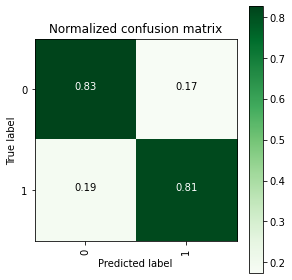

-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.85      0.83      0.84       126
           1       0.78      0.81      0.80        97

    accuracy                           0.82       223
   macro avg       0.82      0.82      0.82       223
weighted avg       0.82      0.82      0.82       223

--------------------------
|      Best Estimator     |
--------------------------

	LogisticRegression(C=10.0)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'C': 10.0, 'penalty': 'l2'}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 5

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.7738974301425203



In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
parameters = {"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}
logreg=LogisticRegression()
lr_grid = GridSearchCV(logreg,param_grid=parameters, n_jobs=-1)
lr_grid_results = perform_model(lr_grid, X_train, y_train, X_test, y_test, class_labels=labels)
print_grid_search_attributes(lr_grid_results['model'])

training the model..
Done 
 

training_time(HH:MM:SS.ms) - 0:00:00.103537


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00


---------------------
|      Accuracy      |
---------------------

    0.852017937219731


--------------------
| Confusion Matrix |
--------------------

 [[115  11]
 [ 22  75]]


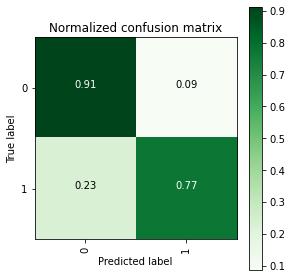

-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.84      0.91      0.87       126
           1       0.87      0.77      0.82        97

    accuracy                           0.85       223
   macro avg       0.86      0.84      0.85       223
weighted avg       0.85      0.85      0.85       223

--------------------------
|      Best Estimator     |
--------------------------

	DecisionTreeClassifier(max_depth=3)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'max_depth': 3}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 5

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.7708225788351475



In [42]:
from sklearn.tree import DecisionTreeClassifier
parameters = {'max_depth':np.arange(3,10,2)}
dt = DecisionTreeClassifier()
dt_grid = GridSearchCV(dt,param_grid=parameters, n_jobs=-1)
dt_grid_results = perform_model(dt_grid, X_train, y_train, X_test, y_test, class_labels=labels)
print_grid_search_attributes(dt_grid_results['model'])

training the model..
Done 
 

training_time(HH:MM:SS.ms) - 0:00:33.349920


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.040105


---------------------
|      Accuracy      |
---------------------

    0.8251121076233184


--------------------
| Confusion Matrix |
--------------------

 [[111  15]
 [ 24  73]]


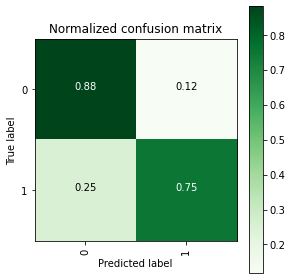

-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       126
           1       0.83      0.75      0.79        97

    accuracy                           0.83       223
   macro avg       0.83      0.82      0.82       223
weighted avg       0.83      0.83      0.82       223

--------------------------
|      Best Estimator     |
--------------------------

	RandomForestClassifier(max_depth=10, n_estimators=500, random_state=42)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'max_depth': 10, 'n_estimators': 500}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 5

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 



In [43]:
from sklearn.ensemble import RandomForestClassifier

n_estimators = [10, 100, 500, 1000, 2000]
max_depth = [5, 10, 20]
parameters = dict(n_estimators=n_estimators, max_depth=max_depth)
rf = RandomForestClassifier(random_state=42)
rf_grid = GridSearchCV(rf,param_grid=parameters, n_jobs=-1)
rf_grid_results = perform_model(rf_grid, X_train, y_train, X_test, y_test, class_labels=labels)
print_grid_search_attributes(rf_grid_results['model'])

In [44]:
model_rf_final = RandomForestClassifier(max_depth= 5, n_estimators= 500)
model_rf_final.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=500)

In [45]:
test

array([[0.        , 1.        , 1.        , ..., 0.        , 0.01528158,
        0.5       ],
       [0.00239808, 1.        , 0.        , ..., 0.125     , 0.01366309,
        1.        ],
       [0.00479616, 0.5       , 1.        , ..., 0.        , 0.01890874,
        0.5       ],
       ...,
       [0.99520384, 1.        , 1.        , ..., 0.        , 0.01415106,
        1.        ],
       [0.99760192, 1.        , 1.        , ..., 0.        , 0.01571255,
        1.        ],
       [1.        , 1.        , 1.        , ..., 0.125     , 0.0436405 ,
        0.        ]])

In [47]:
test_pred = pd.Series(model_rf_final.predict(test), name = "Survived")
test_pred_final = pd.DataFrame(test_pred)

In [48]:
test_pred_final.head()

,Survived
0,0
1,0
2,0
3,0
4,0


In [52]:
submission = pd.DataFrame({
        "PassengerId": testo["PassengerId"],
        "Survived": test_pred_final['Survived']
    })
submission.to_csv('Titanic Submission.csv', index = False)

print('Done')

Done


In [53]:
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
